In [16]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import os
import pandas as pd

In [17]:
train_dir = "../dataset/train/images"
test_dir = "../dataset/test"

In [18]:
BATCH_SIZE = 32
IMG_SIZE = (300, 300)
NUM_CLASSES = 6

In [19]:
train_ds = image_dataset_from_directory(
    train_dir,
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training"
)

Found 700 files belonging to 6 classes.
Using 560 files for training.


In [20]:
val_ds = image_dataset_from_directory(
    train_dir,
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation"
)

Found 700 files belonging to 6 classes.
Using 140 files for validation.


In [21]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [22]:
base_model = EfficientNetB3(
    include_top=False, 
    input_shape=IMG_SIZE + (3,), 
    weights='imagenet'
)
base_model.trainable = False

In [23]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

In [24]:
model = Model(
    inputs=base_model.input, 
    outputs=output
)

In [25]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [26]:
early_stopping = EarlyStopping(
    monitor='val_loss',       
    patience=10,               
    verbose=1,
    mode='min',               
    restore_best_weights=True 
)

In [27]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[early_stopping]  
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 144s 6s/step - accuracy: 0.2586 - loss: 1.7633 - val_accuracy: 0.3571 - val_loss: 1.4925
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 104s 6s/step - accuracy: 0.4197 - loss: 1.4401 - val_accuracy: 0.4714 - val_loss: 1.3794
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 100s 6s/step - accuracy: 0.4433 - loss: 1.4035 - val_accuracy: 0.4500 - val_loss: 1.3253
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 98s 5s/step - accuracy: 0.4940 - loss: 1.2712 - val_accuracy: 0.4714 - val_loss: 1.2901
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 97s 5s/step - accuracy: 0.4984 - loss: 1.2788 - val_accuracy: 0.5643 - val_loss: 1.2623
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 98s 5s/step - accuracy: 0.5169 - loss: 1.2368 - val_accuracy: 0.5929 - val_loss: 1.2293
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 98s 5s/step - accuracy: 0.5555 - loss: 1.1743 - val_accuracy: 0.5143 - val_loss: 1.2580
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 97s 5s/step - accuracy: 0.5476 - loss: 1.1835 - val_accuracy: 0.6357 

In [28]:
model_save_path = '../results/efficientnetb3_model.h5'
model.save(model_save_path)
print(f"model saved to {model_save_path}")

model saved to ../results/efficientnetb3_model.h5


In [29]:
history_df = pd.DataFrame(history.history)
history_csv_path = '../results/efficientnetb3_history.csv'
history_df.to_csv(history_csv_path, index=False)
print(f"training history saved to {history_csv_path}")

training history saved to ../results/efficientnetb3_history.csv


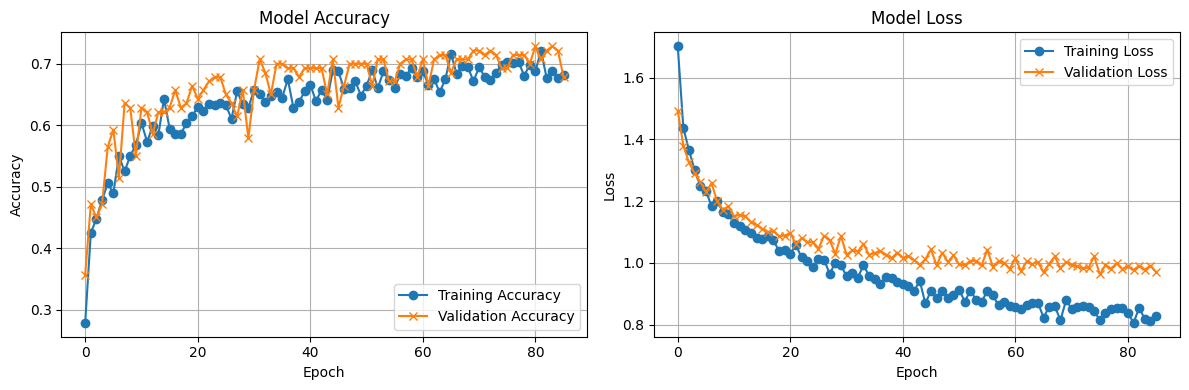

In [30]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], marker='o', label='Training Accuracy')
plt.plot(history_df['val_accuracy'], marker='x', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], marker='o', label='Training Loss')
plt.plot(history_df['val_loss'], marker='x', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()